In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
b_train = pd.read_csv('F:/DATA SCIENCE/INTERNSHALA/UPGRAD/bank-additional/Bank.csv')

In [3]:
b_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
b_train.shape

(41188, 21)

In [5]:
b_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
b_train.isnull().sum().sort_values(ascending=False)

# Checking if there is any null values in data set.

y                 0
day_of_week       0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
duration          0
nr.employed       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
age               0
dtype: int64

In [7]:
replacement = {
    "no" : 0,
    "yes": 1
}

b_train['y'] = b_train['y'].apply(lambda x: replacement.get(x))

# Converting values of target column 'y' to 0 and 1 to study the responses

b_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


# Converting Months into Quarters to check its the impact on response

In [8]:
replacement = {
    
    'jan': 1,
    'feb': 1,
    'mar': 1,
    'apr': 2,
    'may': 2,
    'jun': 2,
    'jul': 3,
    'aug': 3,
    'sep': 3,
    'oct': 4,
    'nov': 4,
    'dec': 4
    
}

b_train['month'] = b_train['month'].apply(lambda x: replacement.get(x))
b_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,2,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [9]:
b_train[["month", "y"]].groupby(['month'], as_index=False).mean()

# It can be seen that customer response is good in the first quarter. And it is also interesting to see the gradual increase later

,month,y
0,1,0.505495
1,2,0.091349
2,3,0.112053
3,4,0.163967


# Checking of the data is balanced or imbalanced

(<matplotlib.axes._subplots.AxesSubplot at 0x2429ecd2518>, None)

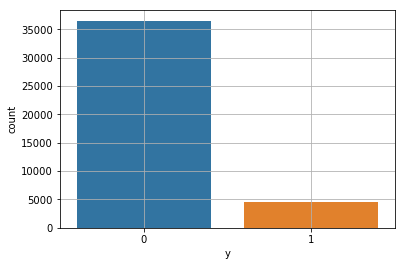

In [10]:
sns.countplot(x='y', data=b_train), plt.grid()



# As per the above observation, the data set is imbalanced.

In [11]:
b_train_num=b_train.select_dtypes(include=[np.number])
#Filters Numericals from the overall data
b_train_cat=b_train.select_dtypes(include=['object'])
#Filters Categorical/Words from the overall data

In [12]:
print(b_train_num.shape)
print(b_train_cat.shape)
print("----------------")
print(b_train_num.columns)
print(b_train_cat.columns)

(41188, 12)
(41188, 9)
----------------
Index(['age', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y'],
      dtype='object')
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'poutcome'],
      dtype='object')


# The categorical are converted into numerical

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
b_train_cat.head()

,job,marital,education,default,housing,loan,contact,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,mon,nonexistent


In [15]:
b_train_cat_encoded=b_train_cat.apply(le.fit_transform)
# This steps encodes the words with a code(numerical)

In [16]:
b_train_cat_encoded.head()

,job,marital,education,default,housing,loan,contact,day_of_week,poutcome
0,3,1,0,0,0,0,1,1,1
1,7,1,3,1,0,0,1,1,1
2,7,1,3,0,2,0,1,1,1
3,0,1,1,0,0,0,1,1,1
4,7,1,3,0,0,2,1,1,1


In [17]:
TRAIN=pd.concat([b_train_num,b_train_cat_encoded],axis=1)
# Combining both numberical and categorical dataframes

In [18]:
TRAIN.head()

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,y,job,marital,education,default,housing,loan,contact,day_of_week,poutcome
0,56,2,261,1,999,0,1.1,93.994,-36.4,4.857,...,0,3,1,0,0,0,0,1,1,1
1,57,2,149,1,999,0,1.1,93.994,-36.4,4.857,...,0,7,1,3,1,0,0,1,1,1
2,37,2,226,1,999,0,1.1,93.994,-36.4,4.857,...,0,7,1,3,0,2,0,1,1,1
3,40,2,151,1,999,0,1.1,93.994,-36.4,4.857,...,0,0,1,1,0,0,0,1,1,1
4,56,2,307,1,999,0,1.1,93.994,-36.4,4.857,...,0,7,1,3,0,0,2,1,1,1


In [19]:
print(TRAIN.shape)
print(TRAIN.columns)

(41188, 21)
Index(['age', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'job', 'marital', 'education', 'default', 'housing',
       'loan', 'contact', 'day_of_week', 'poutcome'],
      dtype='object')


# Since the duration consists of continuous values, it must be converted into categories for better understanding

In [20]:
TRAIN['CategoricalDuration'] = pd.qcut(TRAIN['duration'], 7)
print (TRAIN[['CategoricalDuration', 'y']].groupby(['CategoricalDuration'], as_index=False).mean())

# Categorising the Duration efficiently

  CategoricalDuration         y
0      (-0.001, 73.0]  0.001821
1       (73.0, 112.0]  0.020776
2      (112.0, 155.0]  0.039638
3      (155.0, 209.0]  0.073011
4      (209.0, 291.0]  0.110655
5      (291.0, 452.0]  0.152081
6     (452.0, 4918.0]  0.392681


In [21]:
TRAIN.loc[(TRAIN['duration'] > -1) & (TRAIN['duration'] <= 73.0), 'duration'] = 0
TRAIN.loc[(TRAIN['duration'] > 73.0) & (TRAIN['duration'] <= 112.0), 'duration'] = 1
TRAIN.loc[(TRAIN['duration'] > 112.0) & (TRAIN['duration'] <= 155.0), 'duration'] = 2
TRAIN.loc[(TRAIN['duration'] > 155.0) & (TRAIN['duration'] <= 209.0), 'duration'] = 3
TRAIN.loc[(TRAIN['duration'] > 209.0) & (TRAIN['duration'] <= 291.0), 'duration'] = 4
TRAIN.loc[(TRAIN['duration'] > 291.0) & (TRAIN['duration'] <= 452.0), 'duration'] = 5
TRAIN.loc[ TRAIN['duration'] > 452.0, 'duration'] = 6
TRAIN['duration'] = TRAIN['duration'].astype(int)
TRAIN['duration'].head()

# Assigning values to the range developed in CategoricalDuration

0    4
1    2
2    4
3    2
4    5
Name: duration, dtype: int32

In [22]:
TRAIN[["duration", "y"]].groupby(['duration'], as_index=False).mean()

# It can be clearly seen that higher duration calls produces positive output

,duration,y
0,0,0.001821
1,1,0.020776
2,2,0.039638
3,3,0.073011
4,4,0.110655
5,5,0.152081
6,6,0.392681


# The number of times they have been contacted must also play a role, it must be converted into categories for better understanding

In [23]:
TRAIN.loc[(TRAIN['campaign'] > -1) & (TRAIN['campaign'] <= 1), 'campaign'] = 0
TRAIN.loc[(TRAIN['campaign'] > 1) & (TRAIN['campaign'] <= 2), 'campaign'] = 1
TRAIN.loc[(TRAIN['campaign'] > 2) & (TRAIN['campaign'] <= 3), 'campaign'] = 2
TRAIN.loc[(TRAIN['campaign'] > 3) & (TRAIN['campaign'] <= 4), 'campaign'] = 3
TRAIN.loc[(TRAIN['campaign'] > 4) & (TRAIN['campaign'] <= 5), 'campaign'] = 4
TRAIN.loc[(TRAIN['campaign'] > 5) & (TRAIN['campaign'] <= 6), 'campaign'] = 5
TRAIN.loc[(TRAIN['campaign'] > 6) & (TRAIN['campaign'] <= 10), 'campaign'] = 6
TRAIN.loc[(TRAIN['campaign'] > 10) & (TRAIN['campaign'] <= 20), 'campaign'] = 7
TRAIN.loc[(TRAIN['campaign'] > 20) & (TRAIN['campaign'] <= 30), 'campaign'] = 8
TRAIN.loc[ TRAIN['campaign'] > 30, 'campaign'] = 9
TRAIN['campaign'] = TRAIN['campaign'].astype(int)
TRAIN['campaign'].head()

0    0
1    0
2    0
3    0
4    0
Name: campaign, dtype: int32

In [24]:
TRAIN[["campaign", "y"]].groupby(['campaign'], as_index=False).mean()

# It can be observed that if a coustomer does not respond in first few attempts, its useless calling him further.

,campaign,y
0,0,0.130371
1,1,0.114570
2,2,0.107471
3,3,0.093927
4,4,0.075047
5,5,0.076609
6,6,0.054652
7,7,0.036517
8,8,0.008065
9,9,0.000000


In [25]:
del TRAIN['CategoricalDuration']

In [26]:
TRAIN_corr=TRAIN.corr()
# Finds out co-relation between the columns in the data

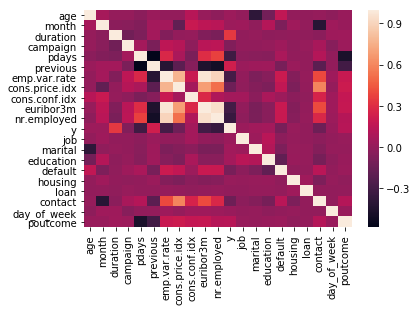

In [27]:
sns.heatmap(TRAIN_corr)
# Just to study heatmao to see the impact

In [28]:
TRAIN_corr["y"]
# Finding the impact of each column agains the target columns

age               0.030399
month             0.031078
duration          0.340339
campaign         -0.071277
pdays            -0.324914
previous          0.230181
emp.var.rate     -0.298334
cons.price.idx   -0.136211
cons.conf.idx     0.054878
euribor3m        -0.307771
nr.employed      -0.354678
y                 1.000000
job               0.025122
marital           0.046203
education         0.057799
default          -0.099352
housing           0.011552
loan             -0.004909
contact          -0.144773
day_of_week       0.015967
poutcome          0.129789
Name: y, dtype: float64

In [29]:
TRAIN_corr[(TRAIN_corr["y"]>0.1) ]
# Gives the complete data of relationships which are greater than 0.10 (Usually the value is chosen in between 0.3-0.5)

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,y,job,marital,education,default,housing,loan,contact,day_of_week,poutcome
duration,0.006522,-0.034046,1.000000,-0.123628,-0.083546,0.054665,-0.061593,-0.001876,0.006899,-0.070331,...,0.340339,-0.004760,0.006323,-0.022122,-0.016585,-0.008818,-0.011858,-0.034147,0.037909,0.041227
previous,0.024365,0.053297,0.054665,-0.085786,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,...,0.230181,0.020965,0.038689,0.038831,-0.102416,0.021314,-0.001327,-0.212848,-0.004102,-0.313110
y,0.030399,0.031078,0.340339,-0.071277,-0.324914,0.230181,-0.298334,-0.136211,0.054878,-0.307771,...,1.000000,0.025122,0.046203,0.057799,-0.099352,0.011552,-0.004909,-0.144773,0.015967,0.129789
poutcome,0.019750,0.018753,0.041227,0.032006,-0.475619,-0.313110,0.192972,0.211330,0.178289,0.184144,...,0.129789,0.011504,0.001912,0.017009,0.023417,-0.011783,-0.001511,0.118744,0.018732,1.000000


In [30]:
TRAIN_corr[(TRAIN_corr["y"]<-0.1) ]
# Gives the complete data of relationships which are lesser than -0.1 

,age,month,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,y,job,marital,education,default,housing,loan,contact,day_of_week,poutcome
pdays,-0.034369,-0.063151,-0.083546,0.059968,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,...,-0.324914,-0.028468,-0.037942,-0.046626,0.080062,-0.010551,0.000345,0.117970,-0.009531,-0.475619
emp.var.rate,-0.000371,0.060038,-0.061593,0.154887,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,...,-0.298334,-0.008271,-0.084210,-0.043778,0.203263,-0.060196,0.001849,0.393584,0.033245,0.192972
cons.price.idx,0.000857,-0.185649,-0.001876,0.121837,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,...,-0.136211,-0.016017,-0.057477,-0.081607,0.168073,-0.080504,-0.002430,0.591474,0.005644,0.211330
euribor3m,0.010767,0.154953,-0.070331,0.135999,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,...,-0.307771,-0.007880,-0.091939,-0.036380,0.195336,-0.059277,0.000125,0.399773,0.039043,0.184144
nr.employed,-0.017725,0.135454,-0.094336,0.148599,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,...,-0.354678,-0.019574,-0.086199,-0.041492,0.189845,-0.045862,0.003903,0.269155,0.028380,0.119689
contact,0.007021,-0.417302,-0.034147,0.075904,0.117970,-0.212848,0.393584,0.591474,0.251614,0.399773,...,-0.144773,-0.025132,-0.054501,-0.105726,0.135238,-0.082186,-0.008556,1.000000,-0.009575,0.118744


In [31]:
TRAIN_corr[(TRAIN_corr["y"]>0.1) ].index.values

array(['duration', 'previous', 'y', 'poutcome'], dtype=object)

In [32]:
TRAIN_corr[(TRAIN_corr["y"]<-0.1) ].index.values

array(['pdays', 'emp.var.rate', 'cons.price.idx', 'euribor3m',
       'nr.employed', 'contact'], dtype=object)

In [33]:
TRAIN_cols = []
TRAIN_cols.extend(TRAIN_corr[(TRAIN_corr["y"]>0.1) ].index.values)
TRAIN_cols.extend(TRAIN_corr[(TRAIN_corr["y"]<-0.1) ].index.values)


# Created a Data Frame TRAIN_cols and imported index values which have high impact on response

In [34]:
TrainingDATA=TRAIN[TRAIN_cols]
TrainingDATA.head()

,duration,previous,y,poutcome,pdays,emp.var.rate,cons.price.idx,euribor3m,nr.employed,contact
0,4,0,0,1,999,1.1,93.994,4.857,5191.0,1
1,2,0,0,1,999,1.1,93.994,4.857,5191.0,1
2,4,0,0,1,999,1.1,93.994,4.857,5191.0,1
3,2,0,0,1,999,1.1,93.994,4.857,5191.0,1
4,5,0,0,1,999,1.1,93.994,4.857,5191.0,1


In [35]:
# Since the Data is IMBALANCED, we can go for any of the sampling techniques such as upsampling (or etc) to balance the data
# Here we have used available data only to build a model

# Splitting Train File into Training Dataset and Testing Dataset to Build Models

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
XX=TrainingDATA.drop(["y"],axis=1)
YY=TrainingDATA["y"]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(XX, YY, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

#X_Train will consist of 70% data and X Test will Consist of 30% data for Testing
# X = all the columns except output(Salesprice)
# Y = only SalesPrice that has to be predicted

(28831, 9)
(12357, 9)
(28831,)
(12357,)


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
LRC=LogisticRegression()

In [40]:
LRC_M=LRC.fit(X_train,y_train)

In [41]:
LRC_M.score(X_train,y_train)

0.90607332385279737

# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()

In [43]:
DTC_M=DTC.fit(X_train,y_train)

In [44]:
DTC_M.score(X_train,y_train)

0.93822621483819502

# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(criterion='gini')

In [46]:
RFC_M=RFC.fit(X_train,y_train)

In [47]:
RFC_M.score(X_train,y_train)

0.93590232735597101

# Support Vector Machine

In [48]:
from sklearn import svm
SVM = svm.SVC(kernel='linear', C=1, gamma=1)

In [49]:
#SVM_M=SVM.fit(X_train,y_train)

In [50]:
#SVM_M.score(X_train, y_train)

# K Nearest Neighbour

In [51]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)

In [52]:
KNN_M=KNN.fit(X_train, y_train)

In [53]:
KNN_M.score(X_train,y_train)

0.91581977732302033

# Gradient Boost Classifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()

In [55]:
GBC_M=GBC.fit(X_train,y_train)

In [56]:
GBC_M.score(X_train,y_train)

0.91144948146092752

# Test Scores of Model Built

In [57]:
from sklearn.metrics import accuracy_score

In [59]:
LRC_pred = LRC_M.predict(X_test)
DTC_pred = DTC_M.predict(X_test)
RFC_pred = RFC_M.predict(X_test)
#SVM_pred = SVM_M.predict(X_test)
KNN_pred = KNN_M.predict(X_test)
GBC_pred = GBC_M.predict(X_test)

In [60]:
accuracy_score(y_test,LRC_pred)*100

91.057700089018368

In [61]:
accuracy_score(y_test,DTC_pred)*100

90.717811766610026

In [62]:
accuracy_score(y_test,RFC_pred)*100

90.814922715869557

In [63]:
#accuracy_score(y_test,SVM_pred)*100

In [64]:
accuracy_score(y_test,KNN_pred)*100

90.636885975560403

In [65]:
accuracy_score(y_test,GBC_pred)*100

91.017237193493557

# PREDICTION

In [ ]:
y_eval=LRC_M.predict(TestingDATA)
# Predicts the Response for the data in TestingDATA

In [ ]:
pd.DataFrame(y_eval).to_csv('File_Name.csv')
# Saves the Predcted Response as .csv file.

# CONCLUSION

# In this assignment we have studied the impact of campaign, call duration, and month on the responses in order to reduces unnecesaary expenses.
# Similary other parameters can also be studied to further know how the response changes.
# We have also built a model which can be used to for prediction.